# Installing Packages

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

# Loading Data in The code

In [131]:
from sklearn.impute import KNNImputer
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r"./database.csv"
data = pd.read_csv(path)
data_copy = data.copy()

# Removing and Replacing the missing values

##### You used **KNN imputation** because it fills in missing values by finding the k-nearest neighbors (similar rows) and using their values, which preserves the data’s relationships and reduces bias compared to mean or median imputation. It maintains variability by considering the local structure of the data, making it flexible and more accurate for datasets with patterns or correlations.

In [132]:
# show_data = data.copy()
data = data.drop(['Date', 'Time'], axis=1)
data.replace(-200, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=5)  # Adjust neighbors based on dataset size
data.iloc[:, :] = imputer.fit_transform(data)

## Skewness

In [133]:
skew_data = data.skew()
skew_data

CO(GT)           1.427133
PT08.S1(CO)      0.751421
NMHC(GT)         1.404432
C6H6(GT)         1.335043
PT08.S2(NMHC)    0.548192
NOx(GT)          1.789747
PT08.S3(NOx)     1.116364
NO2(GT)          0.706532
PT08.S4(NO2)     0.200259
PT08.S5(O3)      0.615468
T                0.299196
RH              -0.034212
AH               0.253810
dtype: float64

# Exploratory Data Analysis (EDA)
#### Used multiple types of graphs to better visualize the dataset

### Histograms

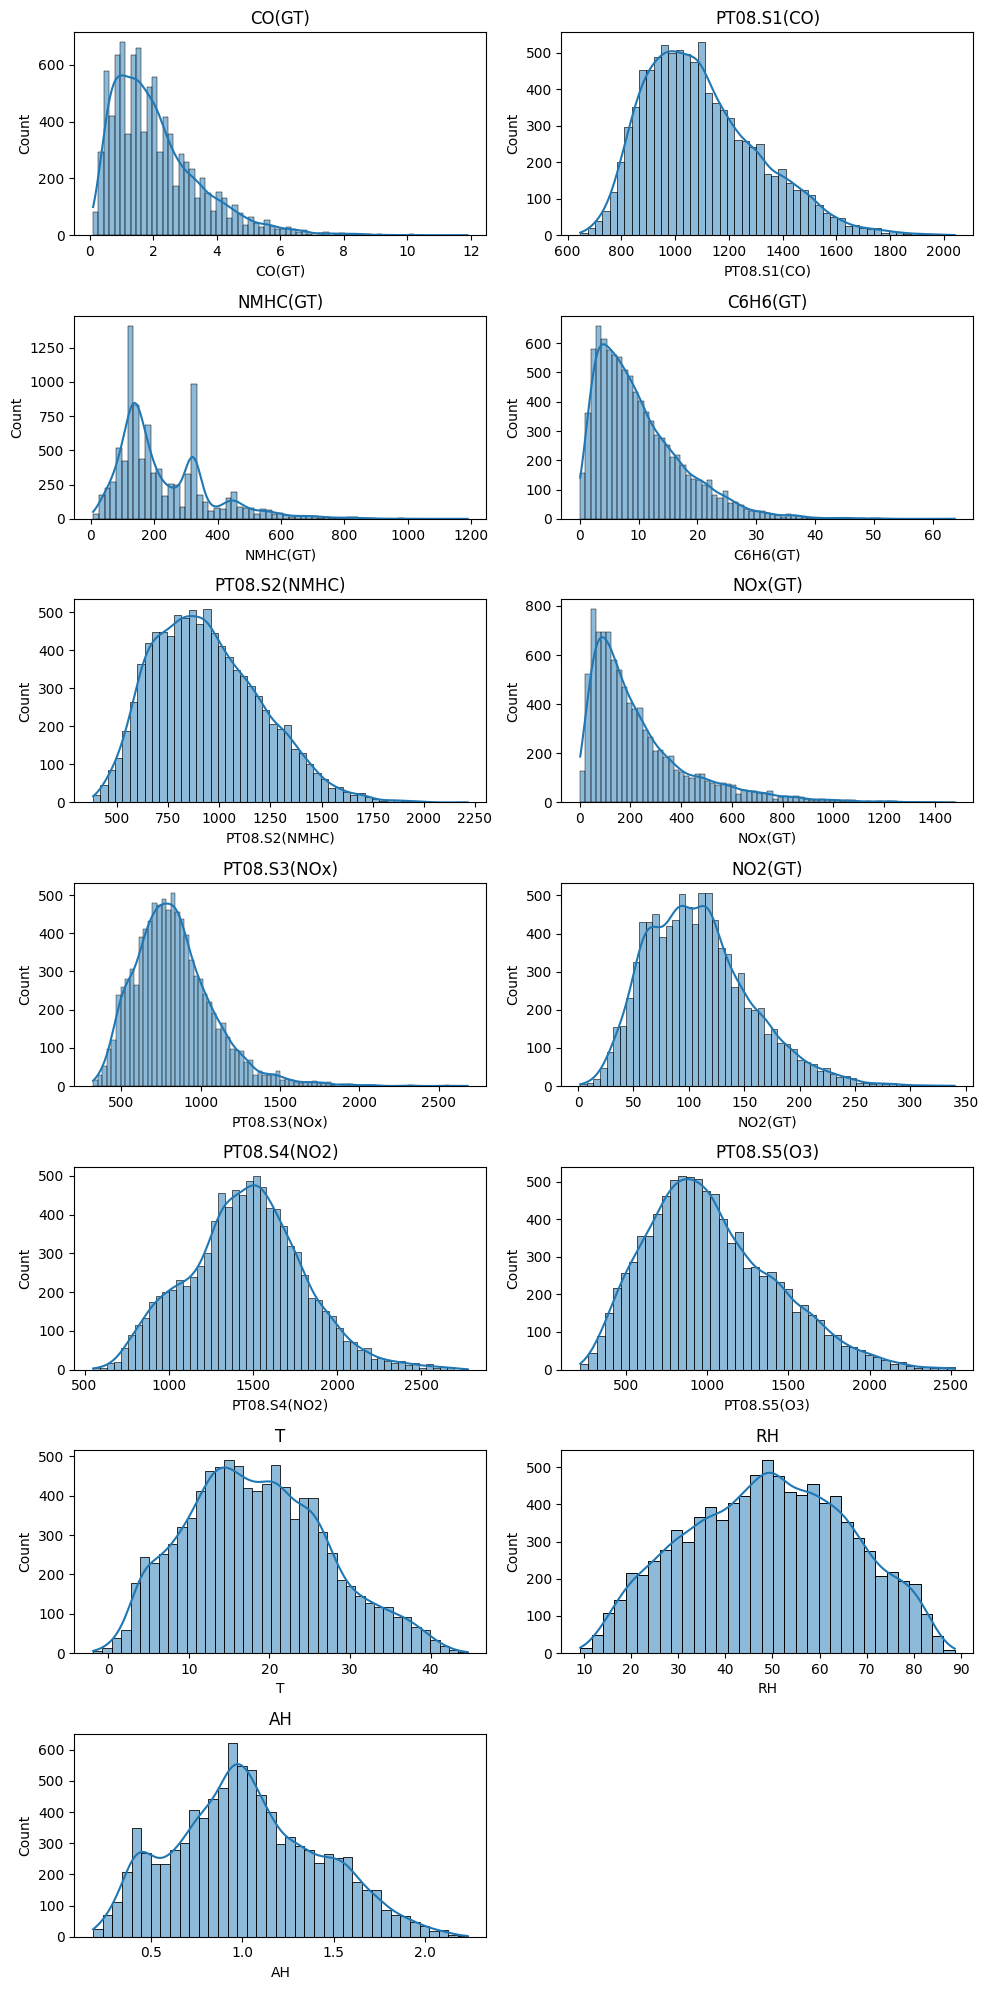

In [134]:
num_columns = data.shape[1]

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Density Plots

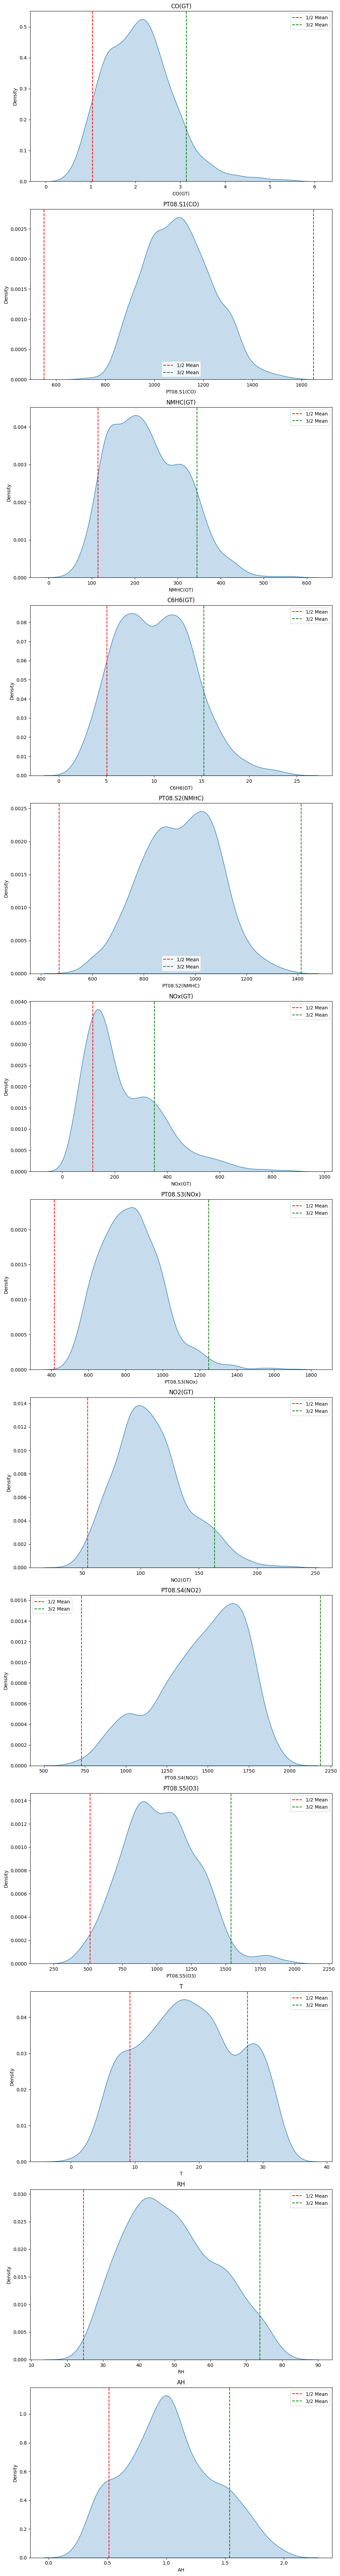

In [135]:
rolling_data = data.rolling(window=24).mean().iloc[::7]

num_columns = rolling_data.shape[1]

fig, axes = plt.subplots(nrows=13, ncols=1, figsize=(10, 75))
axes = axes.flatten()

for i, column in enumerate(rolling_data.columns):
    sns.kdeplot(data=rolling_data, x=column, ax=axes[i], fill=True)
    axes[i].set_title(column)
    
    # Calculate the mean of the column
    mean_value = rolling_data[column].mean()
    
    # Add vertical lines at 1/2 of the mean and 3/2 of the mean
    axes[i].axvline(x=mean_value / 2, color='r', linestyle='--', label='1/2 Mean')
    axes[i].axvline(x=3 * mean_value / 2, color='g', linestyle='--', label='3/2 Mean')
    axes[i].legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlation

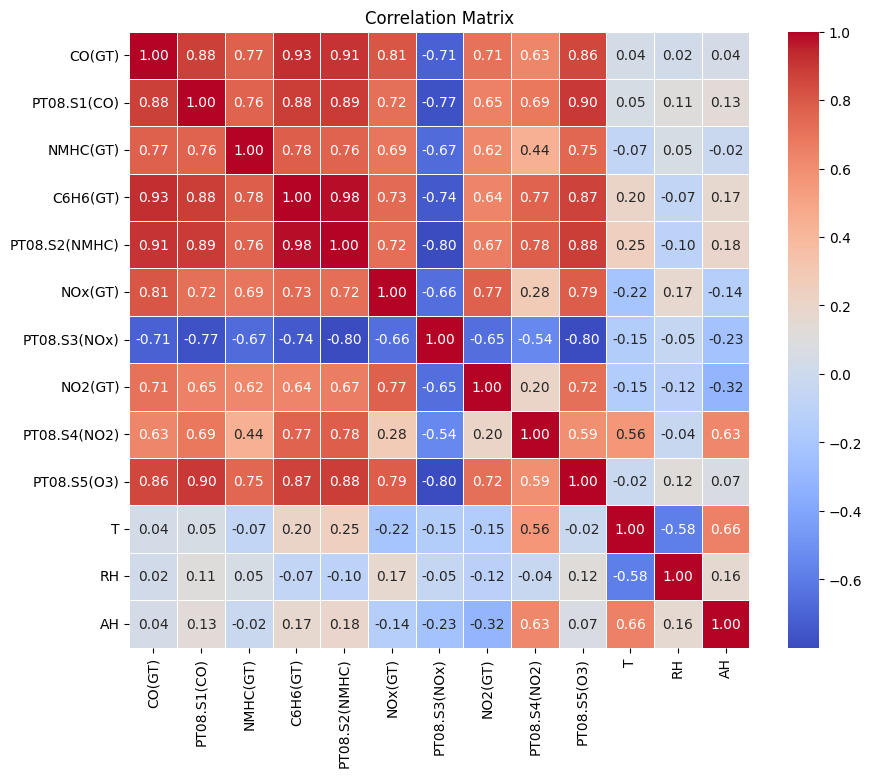

In [136]:
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Box and Whiskers graph

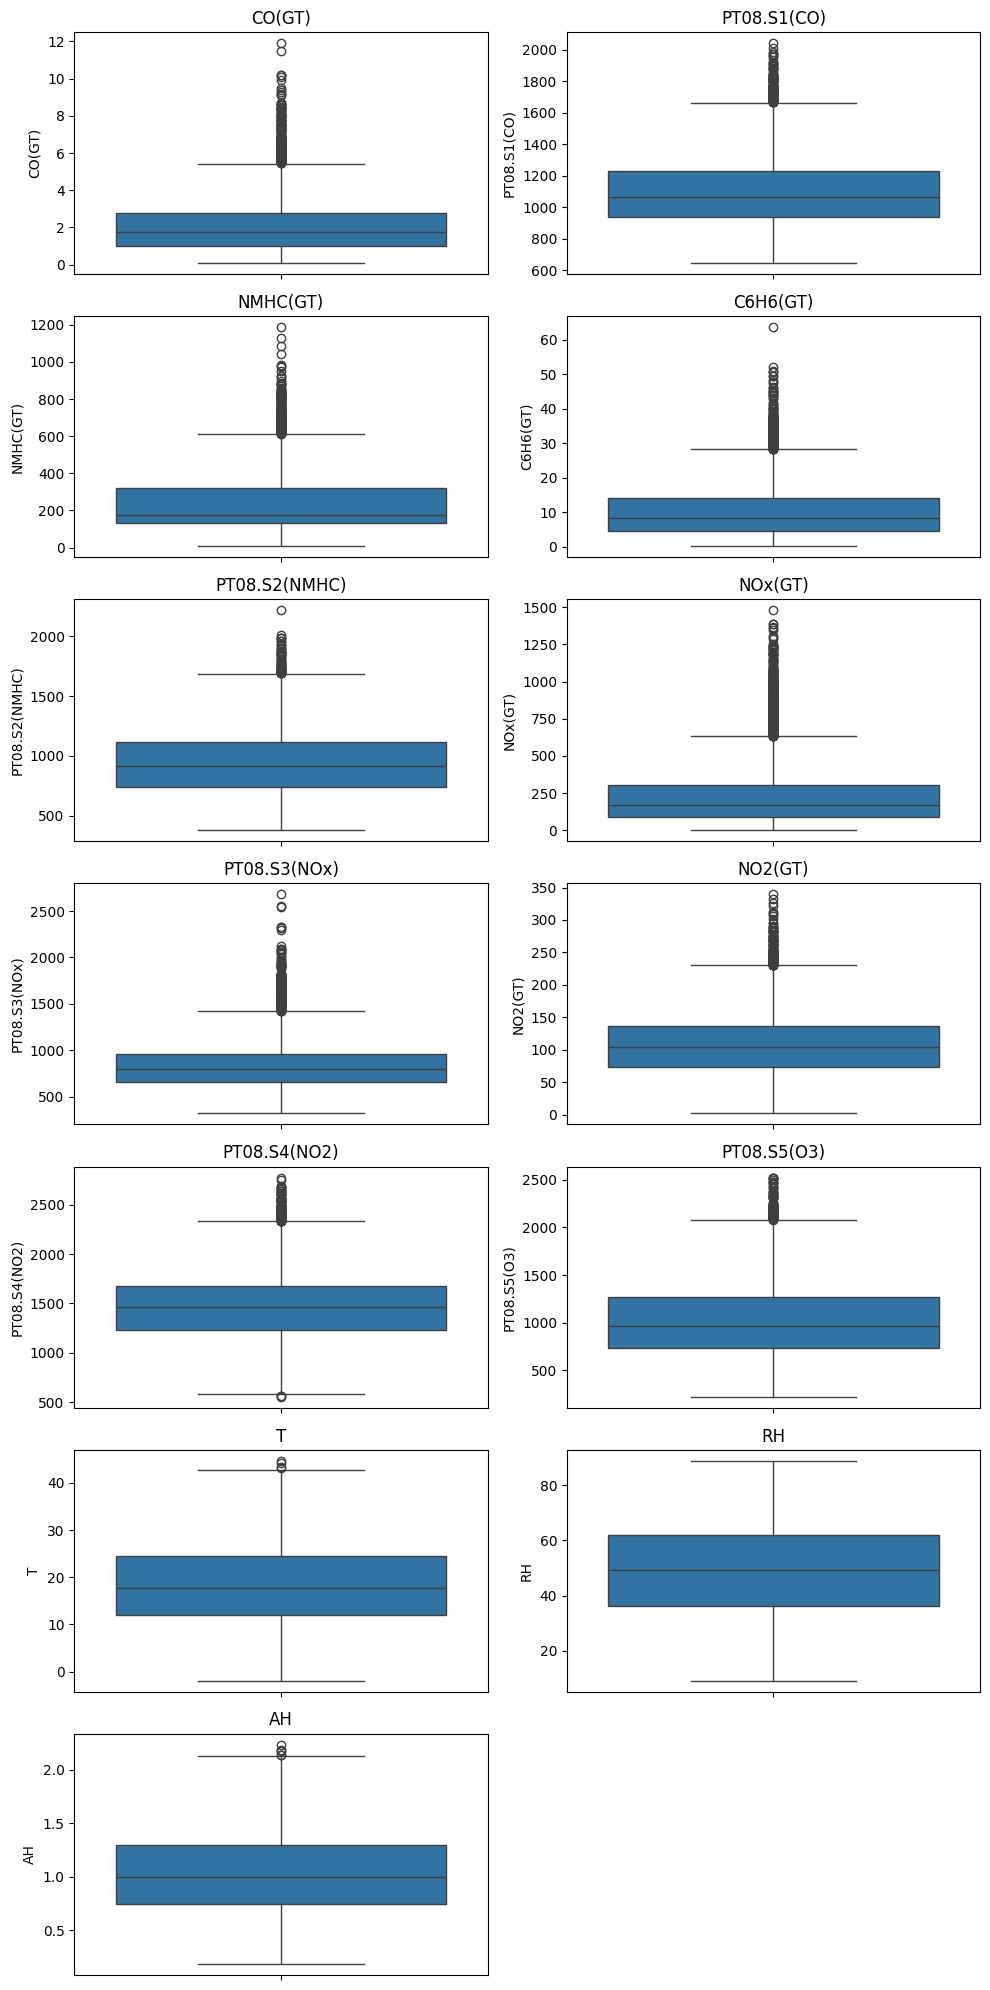

In [137]:
num_columns = data.shape[1]

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.boxplot(data=data[column], ax=axes[i])
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Scatter Plots

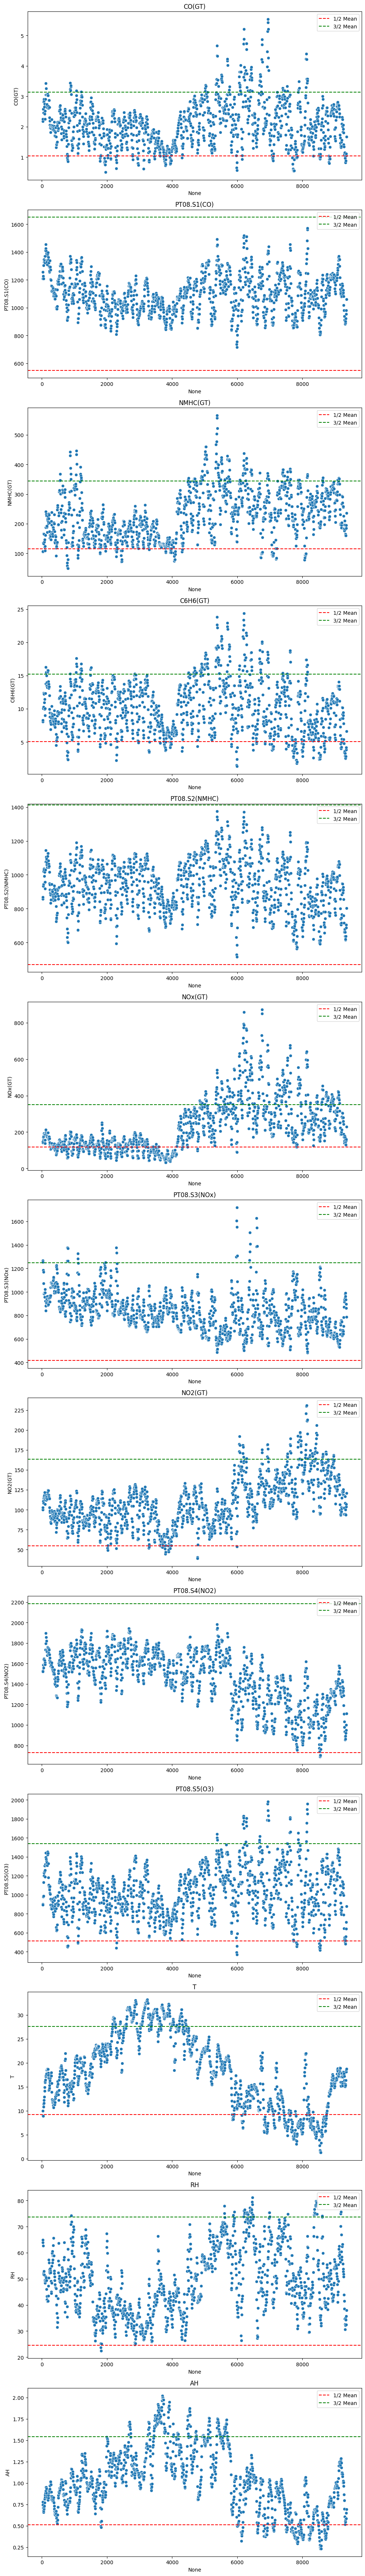

In [138]:
rolling_data = data.rolling(window=24).mean().iloc[::7]

num_columns = rolling_data.shape[1]

fig, axes = plt.subplots(nrows=13, ncols=1, figsize=(10, 70))
axes = axes.flatten()

for i, column in enumerate(rolling_data.columns):
    sns.scatterplot(data=rolling_data, x=rolling_data.index, y=column, ax=axes[i])
    axes[i].set_title(column)
    
    mean_value = rolling_data[column].mean()
    
    axes[i].axhline(y=mean_value / 2, color='r', linestyle='--', label='1/2 Mean')
    axes[i].axhline(y=3 * mean_value / 2, color='g', linestyle='--', label='3/2 Mean')
    axes[i].legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Outlier Detection & Handling

### Used Z-Score for skewness value of less than 1 and more than -1 
### And used IQR otherwise

In [139]:
import numpy as np
import pandas as pd

skewness = data.skew()

outliers = pd.DataFrame()

for column in data.columns:
    if skewness[column] < 1 or skewness[column] > -1:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        column_outliers = data[z_scores > 3]
    else:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        column_outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    
    outliers = pd.concat([outliers, column_outliers])

outliers = outliers.drop_duplicates()

cleaned_data = data.drop(outliers.index)

print("Data after removing outliers:")
print(cleaned_data)

Data after removing outliers:
      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6       1360.0     150.0      11.9         1046.0    166.0   
1        2.0       1292.0     112.0       9.4          955.0    103.0   
2        2.2       1402.0      88.0       9.0          939.0    131.0   
3        2.2       1376.0      80.0       9.2          948.0    172.0   
4        1.6       1272.0      51.0       6.5          836.0    131.0   
...      ...          ...       ...       ...            ...      ...   
9352     3.1       1314.0     323.2      13.5         1101.0    472.0   
9353     2.4       1163.0     323.2      11.4         1027.0    353.0   
9354     2.4       1142.0     323.2      12.4         1063.0    293.0   
9355     2.1       1003.0     305.2       9.5          961.0    235.0   
9356     2.2       1071.0     334.8      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056

# Feature Scaling

### For data between 0 to 1 we will use min-max scaler to scale the data

In [140]:
array = data.values
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
rescaled_data = pd.DataFrame(data_scaler.fit_transform(array))
rescaled_data.columns = data.columns
rescaled_data.index = data.index
data = rescaled_data
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,0.168401,0.325417,0.188464,0.157945,0.305051,0.157094,0.216434,0.316341,0.407475,0.349723,0.436133,0.502714,0.410990
std,0.120128,0.154128,0.124571,0.116782,0.145145,0.139195,0.107546,0.139274,0.153784,0.171567,0.187757,0.215097,0.193952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076271,0.209620,0.104399,0.069182,0.193337,0.059580,0.142313,0.210059,0.307104,0.224587,0.298925,0.339623,0.274202
50%,0.138983,0.300790,0.142640,0.128931,0.289459,0.112390,0.204151,0.301775,0.409173,0.325804,0.423656,0.505660,0.396863
75%,0.227119,0.417803,0.267513,0.218553,0.400874,0.206500,0.272342,0.396450,0.504946,0.457428,0.565591,0.665409,0.544397
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Time-Based Feature Engineering

In [141]:
data['datetime'] = pd.to_datetime(data_copy['Date'] + ' ' + data_copy['Time'])

data['Hour'] = data['datetime'].dt.hour
data['Day'] = data['datetime'].dt.dayofweek
data['Month'] = data['datetime'].dt.month

print("Data with extracted time-based features:")
print(data[['datetime', 'Hour', 'Day', 'Month']].head())

Data with extracted time-based features:
             datetime  Hour  Day  Month
0 2004-03-10 18:00:00    18    2      3
1 2004-03-10 19:00:00    19    2      3
2 2004-03-10 20:00:00    20    2      3
3 2004-03-10 21:00:00    21    2      3
4 2004-03-10 22:00:00    22    2      3


In [142]:

print(data[['Hour', 'Day', 'Month']].describe())

              Hour          Day        Month
count  9357.000000  9357.000000  9357.000000
mean     11.498557     3.009939     6.310356
std       6.923182     2.000323     3.438160
min       0.000000     0.000000     1.000000
25%       5.000000     1.000000     3.000000
50%      11.000000     3.000000     6.000000
75%      18.000000     5.000000     9.000000
max      23.000000     6.000000    12.000000
